Modeling gene expression with differential equations

constiutive gene expression -> constant, no regulation

reaction kinetics, rate * concentration 

In [1]:
import numpy as np
from scipy.integrate import odeint
import dnaplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

## Modeling the first order TXTL system

In [2]:
# lets model the txtl systems!

dna_concentrations = [2] # 1 nM or 2 nM

k_tx = 0.5
k_tl = 0.0003
k_mat = 0.001
tau_m = 1000

m, p_d, p_m = initial_conditions = [0.0, 0.0, 0.0]

def direct_txtl_deGFP(y,t, dna_conc):
    
    m,p_d,p_m = y # this expands the input vector to the variables
    
    dmdt = k_tx * dna_conc - m / tau_m
    
    dp_ddt = k_tl * m - k_mat * p_d
    
    dp_mdt = k_mat * p_d
    
    return [dmdt, dp_ddt, dp_mdt]


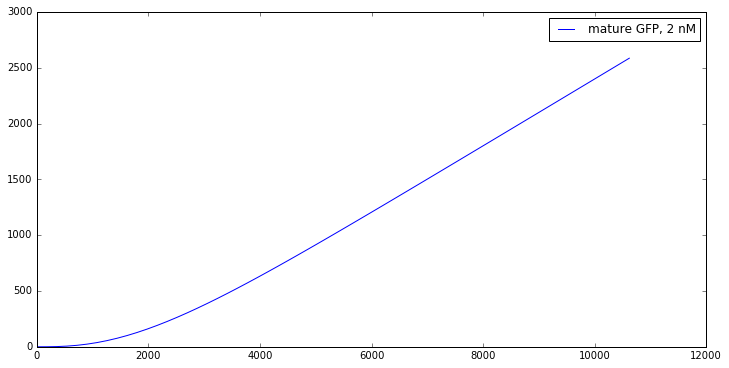

In [3]:
t = np.arange(0, 3600*3, 3*60) # simulate over 3 hours, sampling every 3 minutes

plt.figure(figsize=(12, 6))
for dna_c in dna_concentrations:
    ym, yp_d, yp_m = zip(*odeint(direct_txtl_deGFP, initial_conditions, t, (dna_c,)))

    # plt.plot(t, ymt, label='target mRNA');

#     plt.plot(t, yp_d, label='dark GFP');
    plt.plot(t, yp_m, label='mature GFP, %d nM' % dna_c);

    # plt.plot(t, ymr, label='repressor mRNA');

plt.legend(loc='best');


In [4]:
import pandas as pd

In [5]:
# gain set to 50 here

deGFP_spec_data = pd.read_excel('supplemental_data/gfp_gain_1.xlsx')

# clean in up a bit
def time_in_seconds(s):
    hour = s['Time'].hour
    minute = s['Time'].minute
    second = s['Time'].second
    
    total_seconds = hour * 3600 + minute * 60 + second
    return total_seconds
      
deGFP_spec_data['ts'] = deGFP_spec_data.apply(time_in_seconds, axis=1)

deGFP_spec_data = deGFP_spec_data.drop('Time', axis=1)


# deGFP_spec_data = deGFP_spec_data.drop('ts', axis=1)
# deGFP_spec_data = deGFP_spec_data.drop(deGFP_spec_data.columns[[ 0]], axis=1)

In [6]:
# plot 
concentration_scale = 1/544.0

deGFP_spec_data['deGFP_2nM_a'] = 1000* deGFP_spec_data['D7'] * concentration_scale
deGFP_spec_data['deGFP_2nM_b'] = 1000*deGFP_spec_data['D8'] * concentration_scale

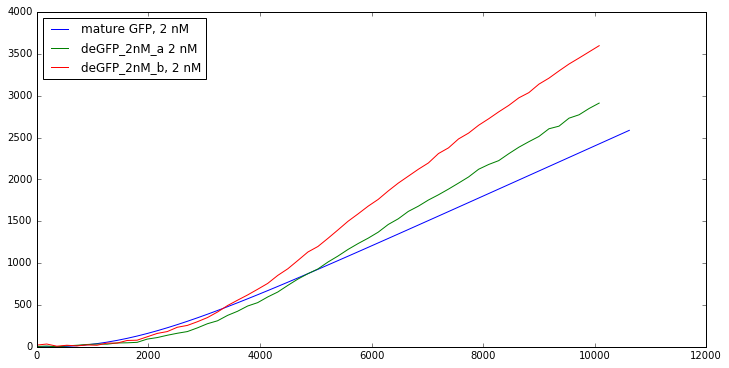

In [7]:
t = np.arange(0, 3600*3, 3*60) # simulate over 3 hours, sampling every 3 minutes

plt.figure(figsize=(12, 6))
for dna_c in dna_concentrations:
    ym, yp_d, yp_m = zip(*odeint(direct_txtl_deGFP, initial_conditions, t, (dna_c,)))

    # plt.plot(t, ymt, label='target mRNA');
#     plt.plot(t, yp_d, label='dark GFP');
    plt.plot(t, yp_m, label='mature GFP, %d nM' % dna_c);

    # plt.plot(t, ymr, label='repressor mRNA');

plt.plot(deGFP_spec_data['ts'], deGFP_spec_data['deGFP_2nM_a'], label='deGFP_2nM_a 2 nM');    
plt.plot(deGFP_spec_data['ts'], deGFP_spec_data['deGFP_2nM_b'], label='deGFP_2nM_b, 2 nM');    
    
plt.legend(loc='best');